In [20]:
from ddeint import ddeint
import numpy as np

def func_f(u, a):
    return 1-(a+1)*u/(u+1)

def func_g(u):
    return u/(1+u)

def func_h(u, c):
    return 1-(c+1)*u/(u+c)

def func_F(x, a, eps):
    return func_f(np.exp(x/eps), a)

def func_G(x, eps):
    return func_g(np.exp(x/eps))

def func_H(x, b, eps):
    return func_h(np.exp(x/eps), b)

a = 1
b = 1
c = 1
m = 10
k = 1
eps=0.1

def initial(t):
    res = np.zeros(m) #np.arange(m)/m
    for idx in range(m):
        res[idx] = np.sin(2*np.pi*t+float(idx)/m)
    return res


def model(X, t, a,b,c,k,eps):
    res = np.zeros(m)
    res[0] = func_F(X(t-1)[0],a,eps) + b*func_G(X(t)[m-1],eps)*func_H(X(t)[0]-X(t)[m-1], b, eps)
    for idx in range(1,m):
        res[idx] = func_F(X(t-1)[idx],a,eps) + b*func_G(X(t)[idx-1],eps)*func_H(X(t)[idx]-X(t)[idx-1], b, eps)    
    return res




In [ ]:
tt = np.linspace(0, 20, 10000)
xx = ddeint(model, initial, tt, fargs=(a,b,c,k,eps))


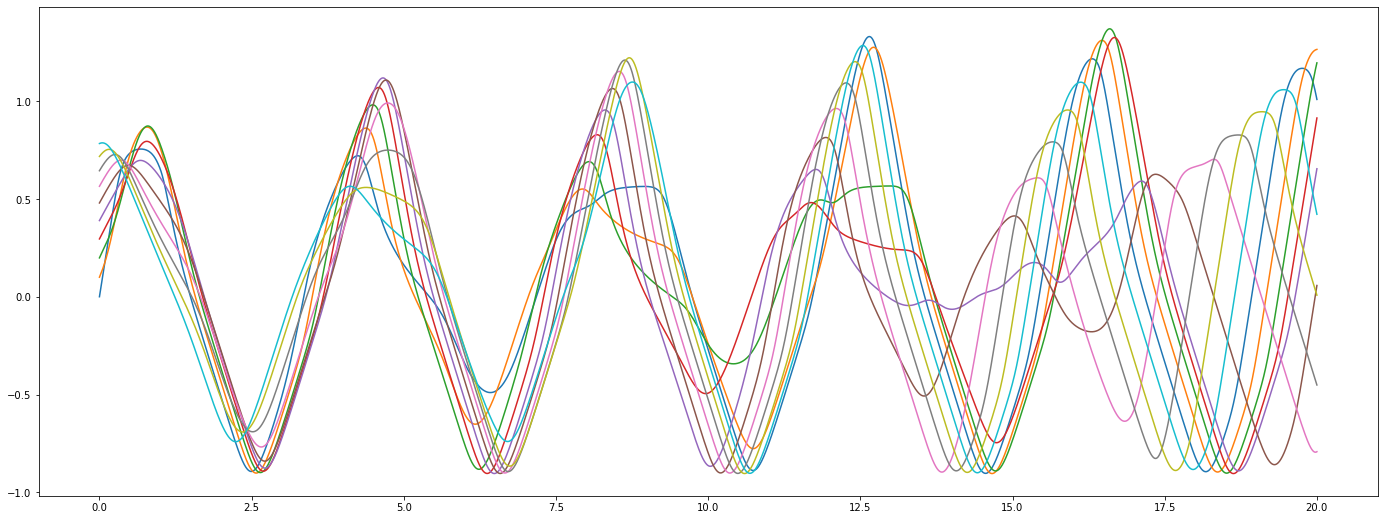

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tt, xx[:,idx])


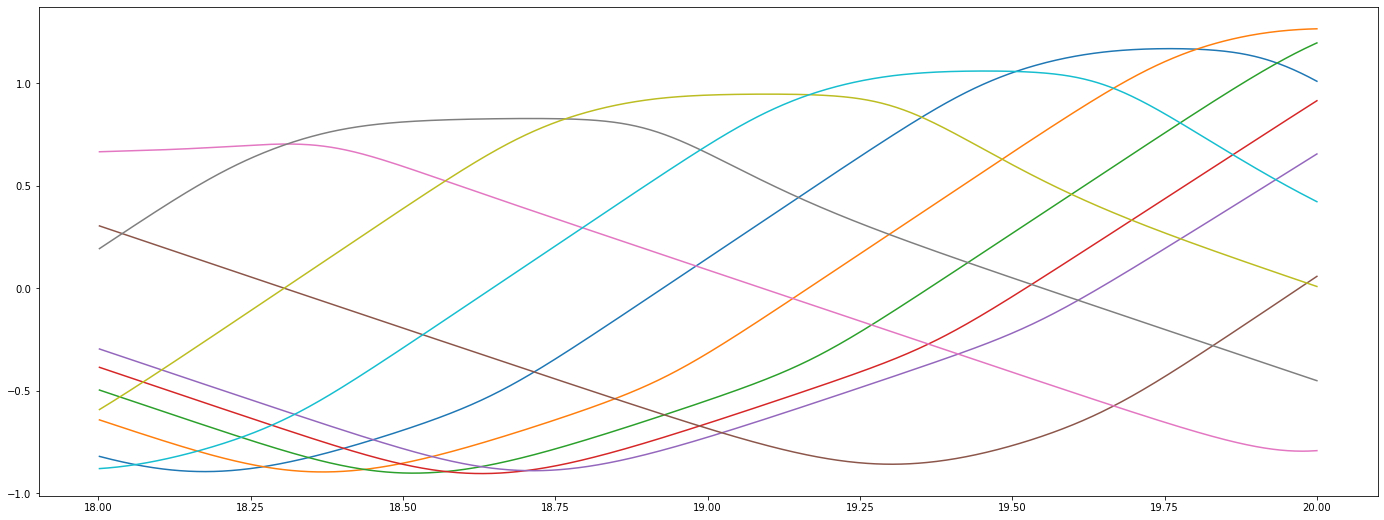

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tt[9000:], xx[9000:,idx])


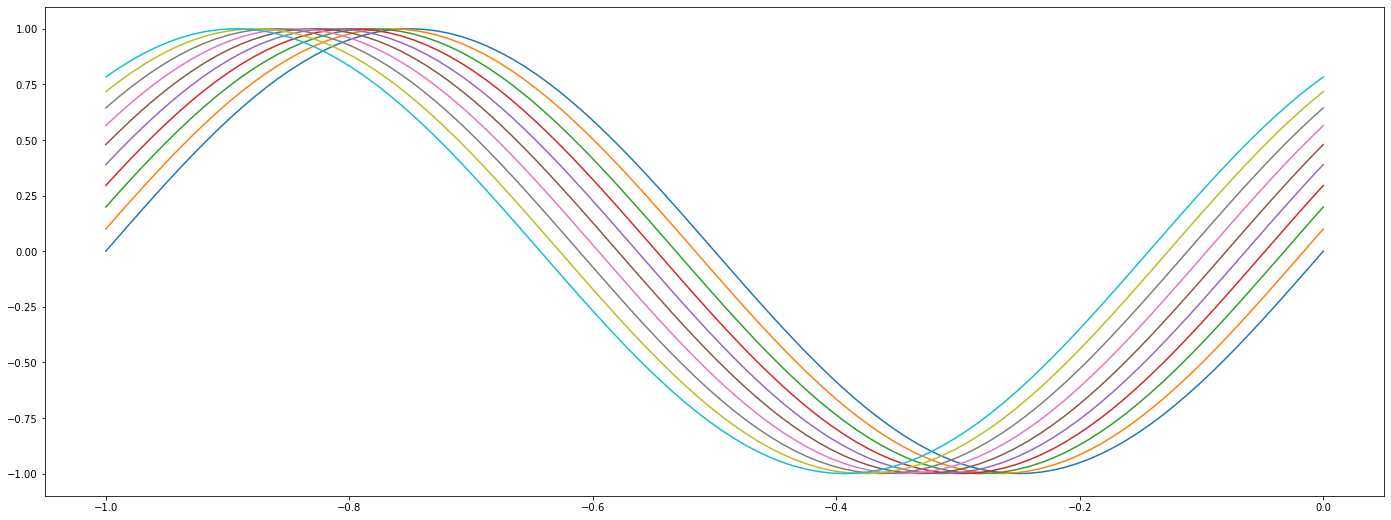

In [21]:
tinit = np.linspace(-1,0,100)
xinit = np.zeros((100,m))
for idx, t in enumerate(tinit):
    xinit[idx] = initial(t)
    
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tinit, xinit[:,idx])